Proposal codes

In [1]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(gridExtra)
install.packages("psych")
library(psych)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


also installing the dependency ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


,vars,n,mean,sd,min,max,range,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STG,1,258,0.3711473,0.2102712,0,0.99,0.99,0.01309091
SCG,2,258,0.3556744,0.2119623,0,0.90,0.90,0.01319620
STR,3,258,0.4680039,0.2459398,0,0.95,0.95,0.01531154
LPR,4,258,0.4327132,0.2481080,0,0.99,0.99,0.01544653
PEG,5,258,0.4585388,0.2552109,0,0.93,0.93,0.01588874


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



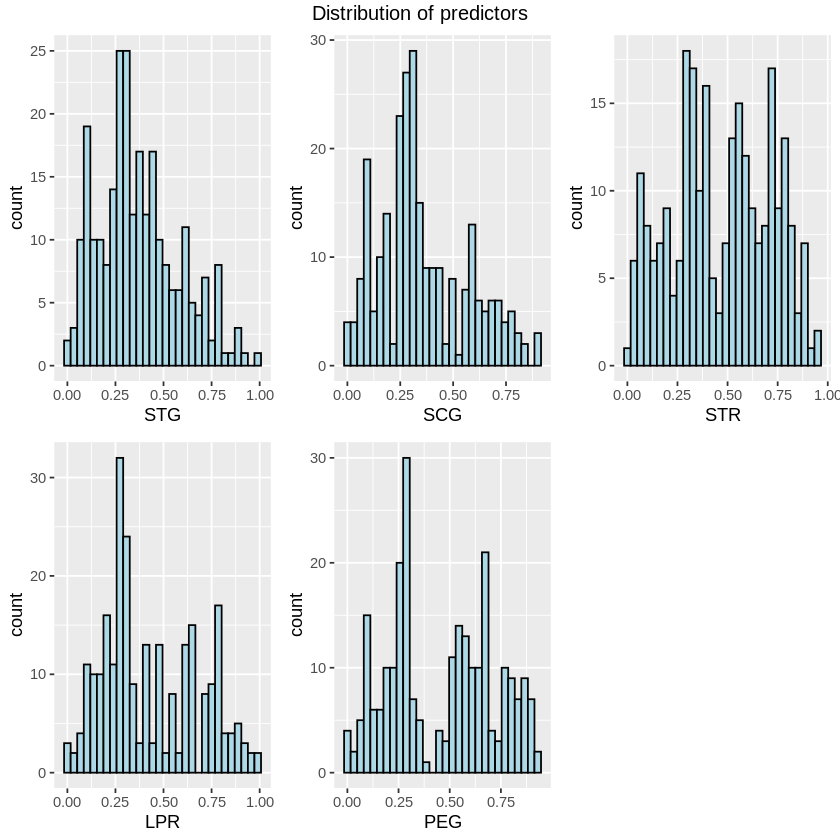

In [12]:
# show data can be read
train_data <- read_excel("Data_User.xls", sheet="Training_Data") |>
              select(STG:UNS)
test_data <- read_excel("Data_User.xls", sheet="Test_Data") |>
              select(STG:UNS)


#tidy data: turn UNS into factors in both sets of data
train_data <- train_data |>
mutate(UNS = as_factor(UNS))

test_data <- test_data |>
mutate(UNS = as_factor(UNS))

#Summary table for predictors in train-data
summary_pred_train <- describe(train_data[-6], fast=TRUE)
summary_pred_train

#visualizing training data
# plots showing distribution of each predictor: 

prawSTG <- ggplot(train_data, aes(STG))+
geom_histogram(colour="black", fill="lightblue", bins=30)

prawSCG <- ggplot(train_data, aes(SCG))+
geom_histogram(colour="black", fill="lightblue")

prawSTR <- ggplot(train_data, aes(STR))+
geom_histogram(colour="black", fill="lightblue")

prawLPR <- ggplot(train_data, aes(LPR))+
geom_histogram(colour="black", fill="lightblue")

prawPEG <- ggplot(train_data, aes(PEG))+
geom_histogram(colour="black", fill="lightblue")

grid.arrange(prawSTG, prawSCG, prawSTR, prawLPR, prawPEG, ncol=3, top="Distribution of predictors")


In [21]:
#clean and wrangle data
#turn class levels to 1,2,3,4 (very low, low, middle, high)